## PROJECT : STOCK PRICE PREDICTION AND FORECASTING (usnig STACK LSTM )

OBJECTIVE: 

> We need to train our machine lerning model to predict and forecast the trend of stock price.


<b> Steps Involve:
* Collection of Stock Data: AAPL (using API)
* Pre-process the Data - Train and Test
* Create an Stacked LSTM Model
* Predict on test data 
* Predict for future 30 days

_____________________

In [187]:
## Importing the libraries :
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [188]:
df = pdr.get_data_tiingo('AAPL', api_key = '9a04ac43dd149dfd59aa595eb6c1b2066b20942c')
display(df.shape, df.tail())

(1258, 12)

close      high       low     open  \
symbol date                                                             
AAPL   2023-03-06 00:00:00+00:00  153.83  156.3000  153.4600  153.785   
       2023-03-07 00:00:00+00:00  151.60  154.0299  151.1300  153.700   
       2023-03-08 00:00:00+00:00  152.87  153.4700  151.8300  152.810   
       2023-03-09 00:00:00+00:00  150.59  154.5350  150.2250  153.559   
       2023-03-10 00:00:00+00:00  148.50  150.9400  147.6096  150.210   

                                    volume  adjClose   adjHigh    adjLow  \
symbol date                                                                
AAPL   2023-03-06 00:00:00+00:00  87558028    153.83  156.3000  153.4600   
       2023-03-07 00:00:00+00:00  56182028    151.60  154.0299  151.1300   
       2023-03-08 00:00:00+00:00  47204791    152.87  153.4700  151.8300   
       2023-03-09 00:00:00+00:00  53833582    150.59  154.5350  150.2250   
       2023-03-10 00:00:00+00:00  68572400    148.50  150.9400  147.6096   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
AAPL   2023-03-06 00:00:00+00:00  153.785   87558028      0.0          1.0  
       2023-03-07 00:00:00+00:00  153.700   56182028      0.0          1.0  
       2023-03-08 00:00:00+00:00  152.810   47204791      0.0          1.0  
       2023-03-09 00:00:00+00:00  153.559   53833582      0.0          1.0  
       2023-03-10 00:00:00+00:00  150.210   68572400      0.0          1.0

In [189]:
df2 = df.reset_index()['close']
df2.tail()

1253    153.83
1254    151.60
1255    152.87
1256    150.59
1257    148.50
Name: close, dtype: float64

Text(0.5, 1.0, 'Stock Price Movement')

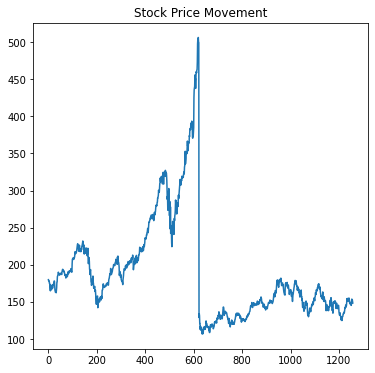

In [190]:
## Plot the closing value

plt.figure(figsize = (6,6))
plt.plot(df2)
plt.title('Stock Price Movement')


### <b> Standardizing the data:

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(1258, 1)

In [192]:
df2

array([[0.18316844],
       [0.17933626],
       [0.17986224],
       ...,
       [0.11529117],
       [0.10958046],
       [0.10434565]])

### <b> Pre-processing the Data

In [193]:
# Splitting the data into Train and test Set:

# Its a time dependent data hence we can't choose training data randomly . 
# Hence we will choose initial 75% of data as traininig as rest as test.

train_df  = df2[:943,:]
test_df   = df2[944:,:]

In [194]:
## VERY IMPORTANT :

## Convert an array of values into a dataset matrix:

def make_dataset(dataset  , time_stamp = 1):
  x_data , y_data = [],[]
  for i in range(len(dataset)- time_stamp-1):
    a = dataset[i:(i+time_stamp), 0]
    x_data.append(a)
    y_data.append(dataset[i+time_stamp, 0])
  return np.array(x_data), np.array(y_data)

In [195]:
# Lets take a time stamp of 100:
time_stamp = 100
x_train, y_train  = make_dataset(train_df, time_stamp)
x_test, y_test      = make_dataset(test_df, time_stamp)

In [196]:
x_train

array([[0.18316844, 0.17933626, 0.17986224, ..., 0.20901691, 0.23709455,
        0.25184721],
       [0.17933626, 0.17986224, 0.17828428, ..., 0.23709455, 0.25184721,
        0.25335003],
       [0.17986224, 0.17828428, 0.17147151, ..., 0.25184721, 0.25335003,
        0.2560551 ],
       ...,
       [0.09718222, 0.1059737 , 0.10429555, ..., 0.13375078, 0.14642455,
        0.14509706],
       [0.1059737 , 0.10429555, 0.09906074, ..., 0.14642455, 0.14509706,
        0.14256731],
       [0.10429555, 0.09906074, 0.08919224, ..., 0.14509706, 0.14256731,
        0.1377583 ]])

In [197]:
print(f''' 
TRAINING SHAPE :
      x_train: {x_train.shape}
      y_train: {y_train.shape}

TEST SHAPE :
      x_test: {x_test.shape}
      y_test: {y_test.shape}
''')

 
TRAINING SHAPE :
      x_train: (842, 100)
      y_train: (842,)

TEST SHAPE :
      x_test: (213, 100)
      y_test: (213,)



In [198]:
## reshaing the input data i.e. x_train and x_test into 3 dimensions which is required for LSTM model:
## [samples, timestamp, features]

x_train  = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test   = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [199]:
print(f''' 
TRAINING SHAPE :
      x_train: {x_train.shape}
      y_train: {y_train.shape}

TEST SHAPE :
      x_test: {x_test.shape}
      y_test: {y_test.shape}
''')

 
TRAINING SHAPE :
      x_train: (842, 100, 1)
      y_train: (842,)

TEST SHAPE :
      x_test: (213, 100, 1)
      y_test: (213,)



### CREATING STACKED LSTM MODEL

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [201]:
model = Sequential(name = "Stacked_LSTM_Model")
model.add(LSTM(50, return_sequences= True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# MODEL SUMMARY
model.summary()

Model: "Stacked_LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [202]:
## Training the model:

model.fit(x_train, y_train, validation_data= (x_test, y_test),epochs = 100)

Epoch 1/100
27/27 [==============================] - 40s 277ms/step - loss: 0.0253 - val_loss: 0.0039
Epoch 2/100
27/27 [==============================] - 5s 183ms/step - loss: 0.0093 - val_loss: 4.3149e-04
Epoch 3/100
27/27 [==============================] - 4s 140ms/step - loss: 0.0068 - val_loss: 7.7791e-04
Epoch 4/100
27/27 [==============================] - 4s 141ms/step - loss: 0.0055 - val_loss: 5.7351e-04
Epoch 5/100
27/27 [==============================] - 5s 184ms/step - loss: 0.0055 - val_loss: 3.1457e-04
Epoch 6/100
27/27 [==============================] - 4s 142ms/step - loss: 0.0039 - val_loss: 2.6841e-04
Epoch 7/100
27/27 [==============================] - 5s 169ms/step - loss: 0.0039 - val_loss: 6.6638e-04
Epoch 8/100
27/27 [==============================] - 5s 198ms/step - loss: 0.0044 - val_loss: 9.2961e-04
Epoch 9/100
27/27 [==============================] - 4s 144ms/step - loss: 0.0032 - val_loss: 4.0037e-04
Epoch 10/100
27/27 [==============================] - 4s 1

In [203]:
## Lets perform the prediction on the test set and train set ::

train_predict = model.predict(x_train)
test_predict  = model.predict(x_test)

7/7 [==============================] - 0s 36ms/step


In [204]:
train_predict

array([[ 0.2143275 ],
       [ 0.22445184],
       [ 0.23377244],
       [ 0.23974784],
       [ 0.24263176],
       [ 0.2441913 ],
       [ 0.24439508],
       [ 0.24453518],
       [ 0.24521552],
       [ 0.24638282],
       [ 0.24905905],
       [ 0.25418016],
       [ 0.2586911 ],
       [ 0.2614677 ],
       [ 0.2626708 ],
       [ 0.26304498],
       [ 0.26330346],
       [ 0.2643698 ],
       [ 0.26657054],
       [ 0.27055657],
       [ 0.27574813],
       [ 0.28177726],
       [ 0.28735393],
       [ 0.29064822],
       [ 0.28994924],
       [ 0.28631276],
       [ 0.2805799 ],
       [ 0.27793732],
       [ 0.27646905],
       [ 0.27844235],
       [ 0.28064653],
       [ 0.27914283],
       [ 0.2758673 ],
       [ 0.27260056],
       [ 0.27098343],
       [ 0.269462  ],
       [ 0.26966467],
       [ 0.27152845],
       [ 0.2729582 ],
       [ 0.2759434 ],
       [ 0.27973858],
       [ 0.28392264],
       [ 0.28850105],
       [ 0.2938704 ],
       [ 0.29649398],
       [ 0

In [205]:
## Transforming it to original form:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [206]:
train_predict

array([[192.41025 ],
       [196.4524  ],
       [200.17365 ],
       [202.55933 ],
       [203.71074 ],
       [204.33339 ],
       [204.41472 ],
       [204.47067 ],
       [204.7423  ],
       [205.20834 ],
       [206.27682 ],
       [208.32143 ],
       [210.12242 ],
       [211.23097 ],
       [211.71132 ],
       [211.86072 ],
       [211.9639  ],
       [212.38963 ],
       [213.2683  ],
       [214.8597  ],
       [216.93243 ],
       [219.33957 ],
       [221.56606 ],
       [222.88129 ],
       [222.60222 ],
       [221.15036 ],
       [218.86153 ],
       [217.80647 ],
       [217.22026 ],
       [218.00812 ],
       [218.88812 ],
       [218.28778 ],
       [216.98003 ],
       [215.67578 ],
       [215.03014 ],
       [214.42268 ],
       [214.50362 ],
       [215.24774 ],
       [215.81856 ],
       [217.01039 ],
       [218.52563 ],
       [220.19612 ],
       [222.02405 ],
       [224.16774 ],
       [225.21523 ],
       [224.59943 ],
       [223.14853 ],
       [222.3

In [207]:
# Getting the ROOT MEAN SQUARED ERROR :
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

In [208]:
print (f'''
TRAIN RMSE : {train_rmse:.3f}
TEST  RMSE : {test_rmse:.3f}
''')


TRAIN RMSE : 213.837
TEST  RMSE : 145.653



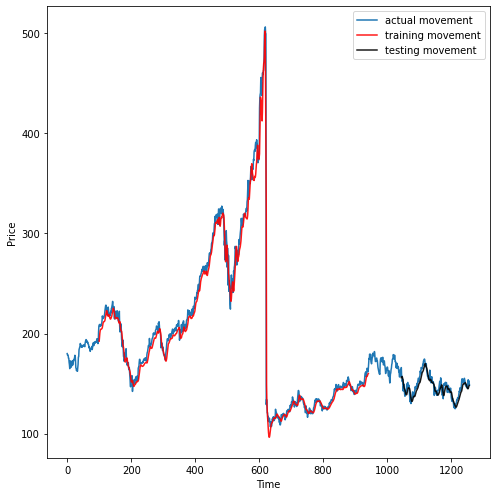

In [209]:
## PLOTTING THE DATA THAT WE GOT :
plt.figure(figsize = (7,7))

plt.plot(scaler.inverse_transform(df2), label = 'actual movement')

## shift train predictions for plotting 
time_stamp = 100
train_pred_plot = np.empty_like(df2)
train_pred_plot[:,:] = np.nan
train_pred_plot[time_stamp: len(train_predict)+time_stamp, :] = train_predict

plt.plot(train_pred_plot, color = 'red' , alpha = 0.9, label = 'training movement')

## shift test predictions for plotting 
test_pred_plot = np.empty_like(df2)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_predict)+(time_stamp*2)+2 : len(df2)-1 , :] = test_predict

plt.plot(test_pred_plot, color = 'black' , alpha = 0.9, label = 'testing movement')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.tight_layout()

## <b> FORECASTING THE PRICE(for next 30 days)

In [210]:
len(test_df)

314

In [211]:
x_input = test_df[214:].reshape(1,-1)  # This should be equal to 100 
(x_input.shape)

(1, 100)

In [212]:
temp_input  = list(x_input)
temp_input  = temp_input[0].tolist()

In [213]:
## PREDICTING FOR NEXT 30 Days:

In [214]:
model.predict(np.array(temp_input[:]).reshape(1,100,1))

1/1 [==============================] - 0s 35ms/step


array([[0.10475412]], dtype=float32)

In [215]:
lst_output  = []

i = 0
while i<30:

  if len(temp_input) > 100:
    x_in = np.array(temp_input[1:])
    x_in = x_in.reshape(1,-1)
    x_in = x_in.reshape(1,100,1)

    y_pred = model.predict(x_in, verbose = 0)
    print (f'Day {i+1} : {y_pred}')

    temp_input.extend(y_pred[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(y_pred.tolist())

    i +=1

  else:
    x_in = x_input.reshape(1,100,1)
    y_pred = model.predict(x_in, verbose = 0)
    print (f'Day {i+1} : {y_pred}')
    temp_input.extend(y_pred[0].tolist())
    temp_input = temp_input
    lst_output.extend(y_pred.tolist())
    i +=1


Day 1 : [[0.10475412]]
Day 2 : [[0.10343266]]
Day 3 : [[0.10175882]]
Day 4 : [[0.10002099]]
Day 5 : [[0.0983284]]
Day 6 : [[0.09670845]]
Day 7 : [[0.0951587]]
Day 8 : [[0.09366827]]
Day 9 : [[0.09222561]]
Day 10 : [[0.09082058]]
Day 11 : [[0.08944497]]
Day 12 : [[0.08809268]]
Day 13 : [[0.08675972]]
Day 14 : [[0.08544399]]
Day 15 : [[0.08414503]]
Day 16 : [[0.08286363]]
Day 17 : [[0.08160149]]
Day 18 : [[0.0803608]]
Day 19 : [[0.07914387]]
Day 20 : [[0.07795287]]
Day 21 : [[0.07678963]]
Day 22 : [[0.07565552]]
Day 23 : [[0.07455132]]
Day 24 : [[0.07347734]]
Day 25 : [[0.0724334]]
Day 26 : [[0.0714189]]
Day 27 : [[0.07043298]]
Day 28 : [[0.06947454]]
Day 29 : [[0.06854241]]
Day 30 : [[0.06763533]]


In [216]:
len(df2)

1258

In [217]:
# Plotting 
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df2.tolist()
df3.extend(lst_output)

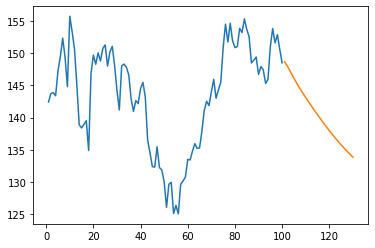

In [218]:
plt.plot(day_new, scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))